In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import tensorflow as tf
import seaborn as sns


### Read the data from github repository and drop uniqe values from it, also combining colunms which are related each other

In [109]:
url = 'https://raw.githubusercontent.com/AtesBurak1/Ceng-474-Final/main/smoking.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
##missing_count = df.isna().sum()  0
##print(missing_count)   0

#No need id because it is unique to everyone
df = df.sort_values(by = 'ID')
df = df.drop(['ID'], axis = 1)
## No need for oral column since every value is 1
df = df.drop(['oral'], axis = 1)

## Encode
df['gender'] = df['gender'].replace({'F': 0, 'M': 1})
df['tartar'] = df['tartar'].replace({'Y': 1, 'N': 0})
## Combine left and right eyesight and hearing



### Fix the blind values for eyesight, then combine eyesight

In [110]:
columns_to_replace = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df[columns_to_replace] = df[columns_to_replace].replace(9.9, 0)

df['eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
df['hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)
df = df.drop(['eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'],axis = 1)

In [111]:
#Describe data to look is there any outlayer values
df.describe()

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.635657,44.182917,164.649321,65.864936,82.046418,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288,0.993679,1.025865
std,0.481250,12.071418,9.194597,12.820306,9.274223,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070,0.301393,0.137929
min,0.000000,20.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,40.000000,160.000000,55.000000,76.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,1.000000,40.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Pieplot

<AxesSubplot: ylabel='gender'>

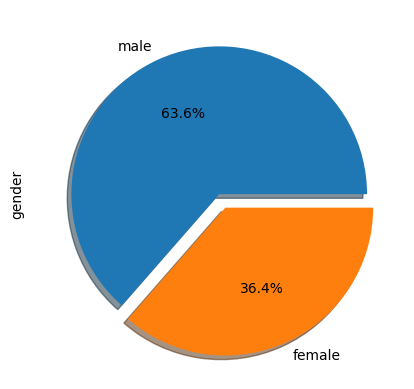

In [112]:
# The pie plot refenced from here -> https://www.kaggle.com/code/abdalrahmanshahrour/predict-smoking-status-accuracy-99-2-93-6
df['gender'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["male","female"], shadow=True)


<AxesSubplot: ylabel='smoking'>

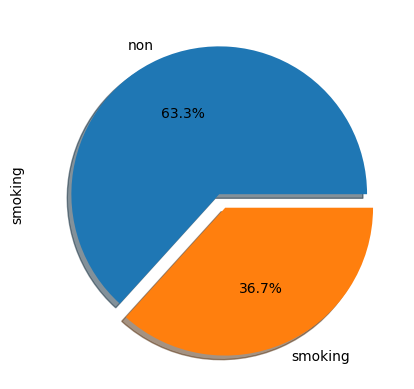

In [113]:

df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

## CatPlot

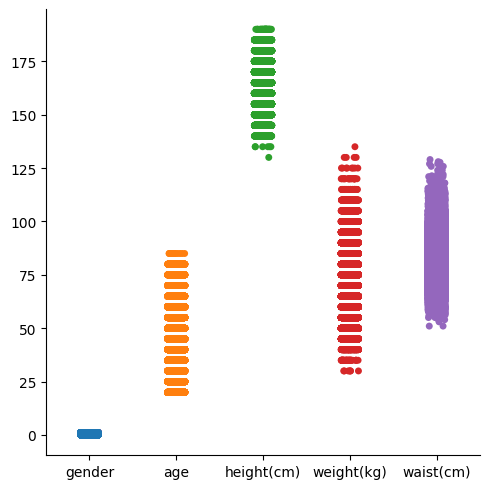

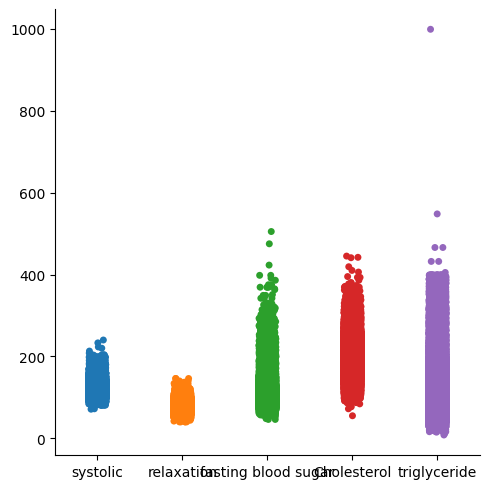

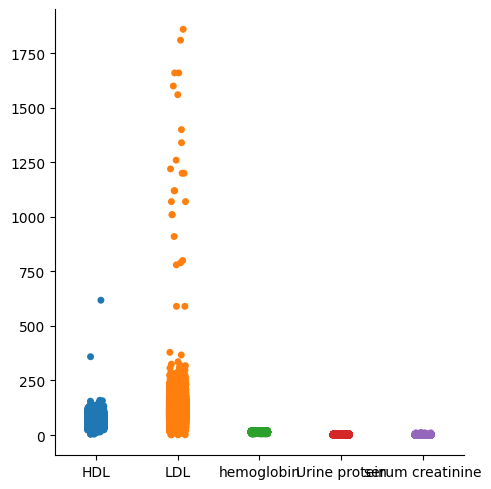

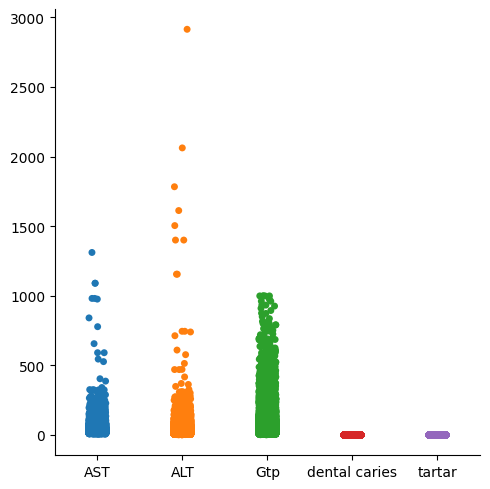

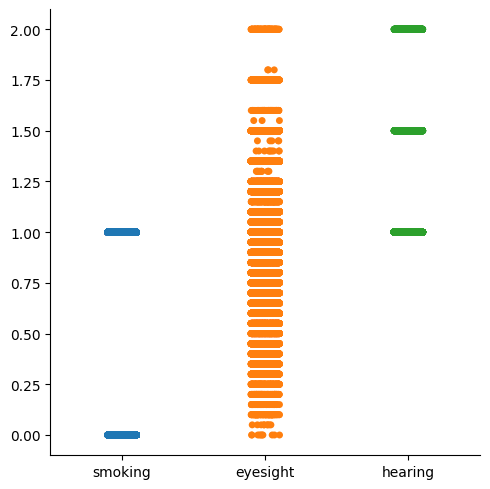

In [114]:
#CatPlots
sns.catplot(df.iloc[:, 0:5])
sns.catplot(df.iloc[:, 5:10])
sns.catplot(df.iloc[:, 10:15])
sns.catplot(df.iloc[:, 15:20])
sns.catplot(df.iloc[:, 20:23])

## BoxPlot

<AxesSubplot: xlabel='gender'>

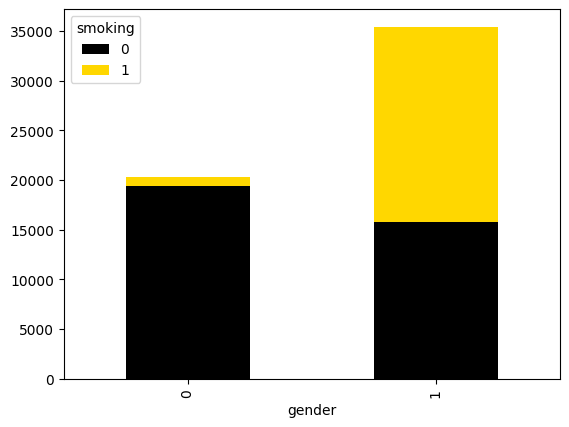

In [115]:
#BoxPlot
smoker_counts = pd.crosstab(index=[df['gender']], columns=df['smoking'], margins=True)

smoker_counts.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False, )


## HeatMap

<AxesSubplot: >

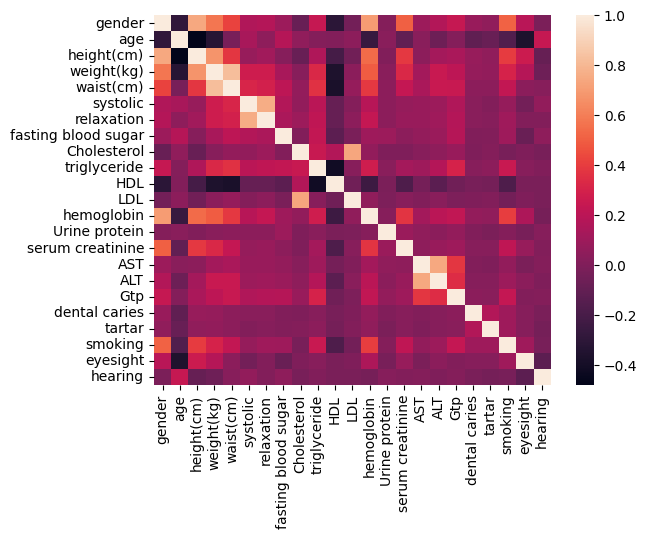

In [116]:
#HeatMap
corelation=df.corr()
sns.heatmap(corelation)

#Get rid of outlayer

In [117]:
# Make max values like this beacuse of outlayers still exist and we cant delete all of them, there could be too much data loss  got the values from https://www.kaggle.com/code/m000sey/ps-3-24-boosting-ensemble-w-nn
df['Gtp'] = np.clip(df['Gtp'], 0, 300)
df['LDL'] = np.clip(df['LDL'], 0, 250)
df['ALT'] = np.clip(df['ALT'], 0, 150)
df['AST'] = np.clip(df['AST'], 0, 100)
df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 2)
df['fasting blood sugar'] = np.clip(df['fasting blood sugar'], 0, 175)
df['triglyceride'] = np.clip(df['triglyceride'], 0, 400)
df['hemoglobin'] = np.clip(df['hemoglobin'], 8, 20)

In [118]:
df.describe() #Now we have more stable values

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.635657,44.182917,164.649321,65.864936,82.046418,121.494218,76.004830,98.688483,196.901422,126.648675,57.290347,114.533452,14.624016,1.087212,0.884299,25.738436,26.544692,38.919252,0.213334,0.555556,0.367288,0.993679,1.025865
std,0.481250,12.071418,9.194597,12.820306,9.274223,13.675989,9.679278,16.748424,36.297940,71.525714,14.738963,33.455773,1.557268,0.404882,0.192356,11.610665,19.156619,40.614719,0.409665,0.496908,0.482070,0.301393,0.137929
min,0.000000,20.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,8.000000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,40.000000,160.000000,55.000000,76.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,1.000000,40.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,240.000000,146.000000,175.000000,445.000000,400.000000,618.000000,250.000000,20.000000,6.000000,2.000000,100.000000,150.000000,300.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Scaled CatPlot


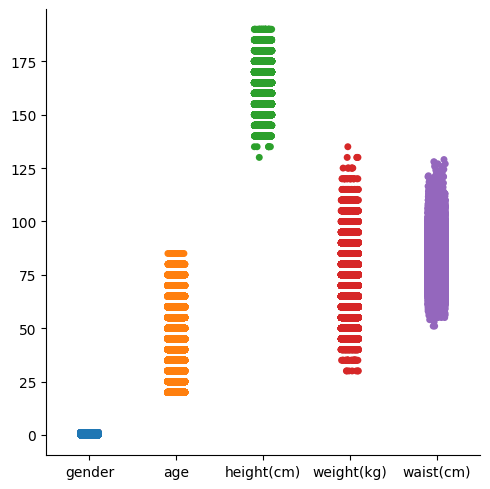

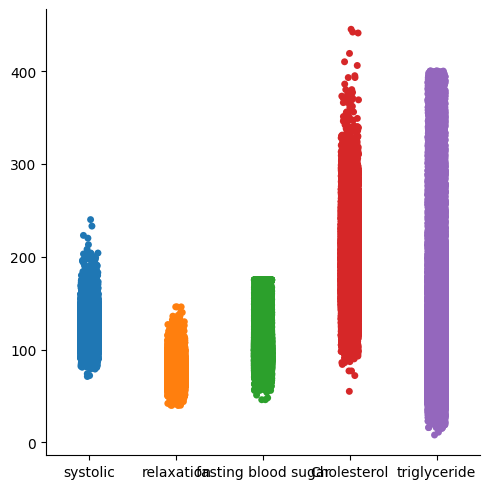

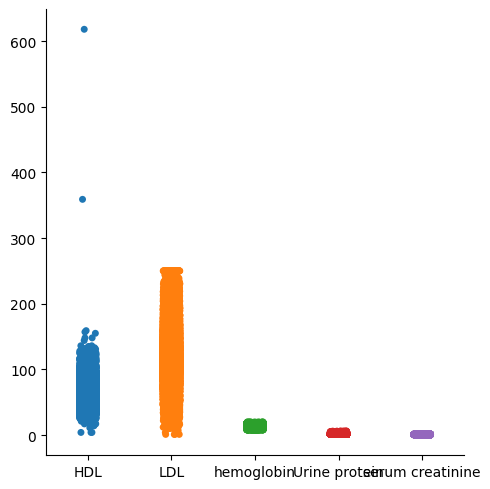

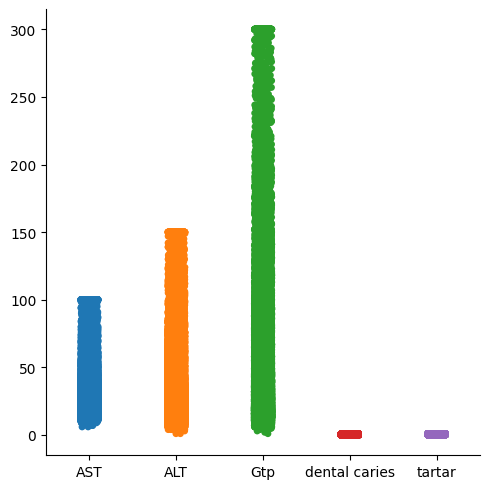

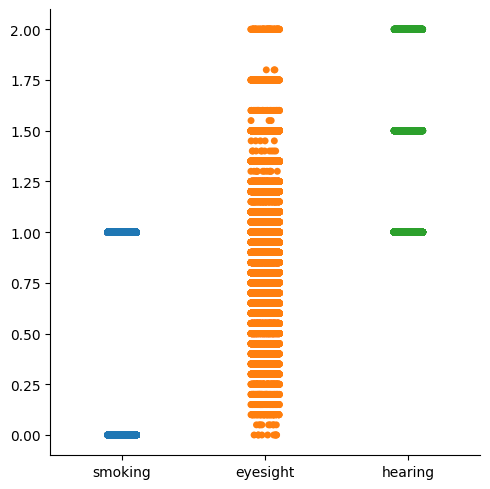

In [119]:
#CatPlot
#CatPlots
sns.catplot(df.iloc[:, 0:5])
sns.catplot(df.iloc[:, 5:10])
sns.catplot(df.iloc[:, 10:15])
sns.catplot(df.iloc[:, 15:20])
sns.catplot(df.iloc[:, 20:23])

### Scaled BoxPlot


<AxesSubplot: xlabel='gender'>

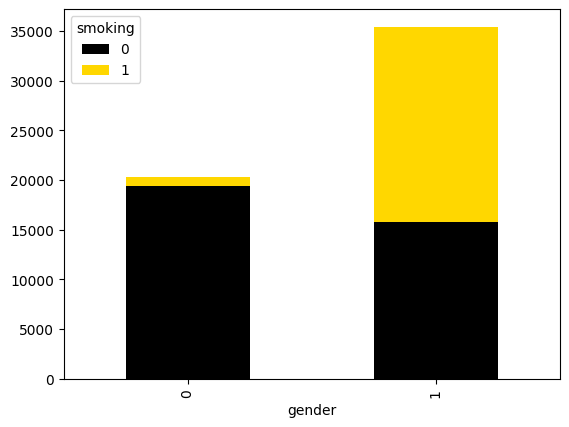

In [120]:
#BoxPlot

smoker_counts = pd.crosstab(index=[df['gender']], columns=df['smoking'], margins=True)

smoker_counts.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False, )


### Scaled HeatMap

<AxesSubplot: >

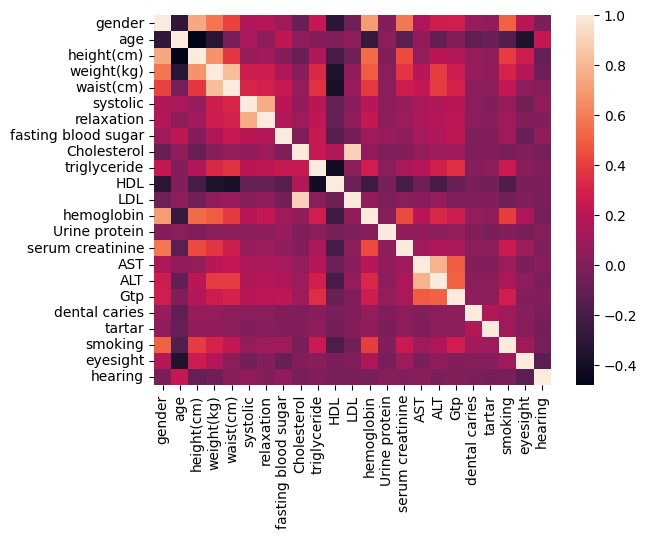

In [121]:
#HeatMap
corelation=df.corr()
sns.heatmap(corelation)

### Split the dataframe as X (features) and Y(outcomes), also convert it to cuDF for using cuML Random Forest Classifier

In [134]:
temp_df = df.copy()
def split_data():
  rows_for_test = []

  test_zero_label = (temp_df['smoking'] == 0).sum()
  test_one_label = df.shape[0] - test_zero_label
  print(test_one_label, test_zero_label)
  test_zero_label = test_zero_label - test_one_label

  counter_0 = int(test_zero_label/128)
  count = 0
  count1 = 0
  print(counter_0)
  index_0 = 0
  index_1 = 0
  quarter_for_0 = 1
  quarter_for_1 = 1
  lenght = temp_df.shape[0]
  j = 1
  while (quarter_for_0 != 128) and (index_0 < lenght):
      if index_0 < lenght:
         row_0 = temp_df.iloc[[index_0]]
         if row_0['smoking'].iloc[0] == 0 and counter_0 > 0 and row_0['gender'].iloc[0] == 1:
           rows_for_test.append(index_0)
           counter_0 -= 1
           count +=1

      if counter_0 == 0:
         counter_0 = int(test_zero_label/128)
         index_0 = int(lenght/128 * quarter_for_0)
         quarter_for_0 += 1

      index_0+=1
  rows_to_move = temp_df.iloc[rows_for_test]
  
  # Deleting the extracted rows from temp_df
  train = temp_df.drop(temp_df.index[rows_for_test])
  
  return train

new_df = split_data()
Y = new_df['smoking']
X = new_df.drop(['smoking'], axis=1)

20455 35237
115


<AxesSubplot: ylabel='smoking'>

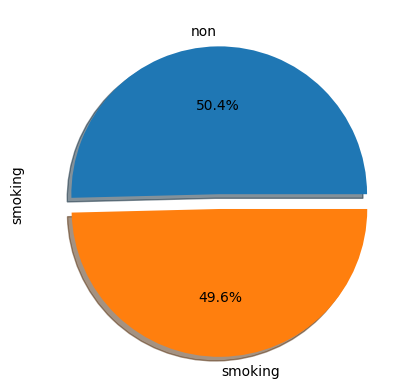

In [135]:

new_df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

# FEATURE SELECTION

### Lasso

In [151]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


# Lets find how many features are needed using a loop and 5 different feature selection method
feature_count = 12 # will go to 8
RFC = RandomForestClassifier(n_estimators=100)
model = {
    'Logistic': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'chi2': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Lasso': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'mutual': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'RFC': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'KNN': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Stacking': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Max_voting': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Deep_learning': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0}
}

for key in model:
    model[key]['accuracy'] = 0
#Only lasso is applied once
lasso = Lasso(alpha=0.01)
lasso.fit(X, Y)

# Get feature which does not have coeffient 0
selected_features = X.columns[lasso.coef_ != 0]
X_lasso = X[selected_features]
X_train_lasso, X_test_lasso, y_train_lasoo, y_test_lasso = train_test_split(X_lasso, Y, test_size=0.2, random_state=13)
RFC.fit(X_train_lasso,y_train_lasoo)


y_pred_lasso = RFC.predict(X_test_lasso)


precision = precision_score(y_test_lasso, y_pred_lasso)
recall = recall_score(y_test_lasso, y_pred_lasso)
f1 = f1_score(y_test_lasso, y_pred_lasso)

roc_auc = roc_auc_score(y_test_lasso, y_pred_lasso)
accuracy = accuracy_score(y_test_lasso, y_pred_lasso)

# Assign these values to the model dictionary
model['Lasso']['precision'] = precision
model['Lasso']['recall'] = recall
model['Lasso']['f1_score'] = f1
model['Lasso']['feature_count'] = X_lasso.shape[1]
model['Lasso']['roc_auc'] = roc_auc
model['Lasso']['accuracy'] = accuracy

In [152]:
model['Lasso']['accuracy']

0.9090578392142598

### Chi2 and mutual_info with SelectKBest

In [138]:
def RFC_train_test_SelectKBest(method, feature_count, X, Y):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1, precision, recall, roc_auc,accuracy


feature_count = 21
while feature_count > 15:
    chi_f1, chi_precision, chi_recall, chi_roc_auc, chi_acc = RFC_train_test_SelectKBest(chi2, feature_count, X, Y)
    mutual_f1, mutual_precision, mutual_recall, mutual_roc_auc, mutual_acc = RFC_train_test_SelectKBest(mutual_info_classif, feature_count, X, Y)

    if chi_f1 > model['chi2']['f1']:
        model['chi2']['f1'] = chi_f1
        model['chi2']['precision'] = chi_precision
        model['chi2']['recall'] = chi_recall
        model['chi2']['feature_count'] = feature_count
        model['chi2']['roc_auc'] = chi_roc_auc
        model['chi2']['accuracy'] = chi_acc

    if mutual_f1 > model['mutual']['f1']:
        model['mutual']['f1'] = mutual_f1
        model['mutual']['precision'] = mutual_precision
        model['mutual']['recall'] = mutual_recall
        model['mutual']['feature_count'] = feature_count
        model['mutual']['roc_auc'] = mutual_roc_auc
        model['mutual']['accuracy'] = mutual_acc
    feature_count -= 1


## Decision Tree

In [ ]:
#Decision TREE

### RFC

In [139]:

def RFC_train_test_RFC(X, Y, feature_count):
    RFC.fit(X, Y)

    # Access feature importances
    feature_importances = RFC.feature_importances_

    # Sort the features
    sorted_feature_indices = feature_importances.argsort()[::-1]

    selected_feature_indices = sorted_feature_indices[:feature_count]

    # Select specified features within cuDF
    X_selected = X.iloc[:, selected_feature_indices]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return f1, precision, recall, roc_auc, accuracy

feature_count = 15
while feature_count < 20:
    RFC_f1, RFC_precision, RFC_recall, RFC_roc_auc, RFC_accuracy = RFC_train_test_RFC(X, Y, feature_count)
    if RFC_f1 > model['RFC']['f1']:
        model['RFC']['f1'] = RFC_f1
        model['RFC']['precision'] = RFC_precision
        model['RFC']['recall'] = RFC_recall
        model['RFC']['feature_count'] = feature_count
        model['RFC']['roc_auc'] = RFC_roc_auc
        model['RFC']['accuracy'] = RFC_accuracy
    feature_count += 1


### Logisctic Reggression

In [140]:
#Logistic Regression Here

### KNN


In [141]:
#KNN here
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)
scaled_data= StandardScaler()    
x_train= scaled_data.fit_transform(X_train)    
x_test= scaled_data.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)



f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


model['KNN']['precision'] = precision
model['KNN']['recall'] = recall
model['KNN']['f1_score'] = f1
model['KNN']['feature_count'] = 23
model['KNN']['roc_auc'] = roc_auc
model['KNN']['accuracy'] = accuracy
print(precision,recall,roc_auc)
#Bad result beacuse of imbalanced data here!

0.8626777832270721 0.8603570555147958 0.8628384604173306


### Max voting

In [142]:
#Max voting here

### Stacking

In [143]:
#Stacking Here

### Deep Learning

In [144]:
#Deep Learning Here

In [145]:
best_method = None
best_acc = 0

for method, info in model.items():
    acc = info['accuracy']
    if acc > best_acc:
        best_method = method
        best_acc = acc
    print(f"{method} has accuracy={info['accuracy']:.4f} roc_auc={info['roc_auc']:.4f}, f1={info['f1']:.4f}, precision={info['precision']:.4f}, recall={info['recall']:.4f}, feature_count={info['feature_count']}")

print(f"The best feature selection method is '{best_method}' with an accuracy of {best_acc:.4f} and feature count {model[best_method]['feature_count']}")

Logistic has accuracy=0.0000 roc_auc=0.0000, f1=0.0000, precision=0.0000, recall=0.0000, feature_count=0
chi2 has accuracy=0.9509 roc_auc=0.9510, f1=0.9512, precision=0.9373, recall=0.9655, feature_count=21
Lasso has accuracy=0.9509 roc_auc=0.9510, f1=0.0000, precision=0.9373, recall=0.9655, feature_count=13
mutual has accuracy=0.9509 roc_auc=0.9510, f1=0.9512, precision=0.9373, recall=0.9655, feature_count=21
RFC has accuracy=0.9509 roc_auc=0.9510, f1=0.9512, precision=0.9373, recall=0.9655, feature_count=15
KNN has accuracy=0.8629 roc_auc=0.8628, f1=0.0000, precision=0.8627, recall=0.8604, feature_count=23
Stacking has accuracy=0.0000 roc_auc=0.0000, f1=0.0000, precision=0.0000, recall=0.0000, feature_count=0
Max_voting has accuracy=0.0000 roc_auc=0.0000, f1=0.0000, precision=0.0000, recall=0.0000, feature_count=0
Deep_learning has accuracy=0.0000 roc_auc=0.0000, f1=0.0000, precision=0.0000, recall=0.0000, feature_count=0
The best feature selection method is 'chi2' with an accuracy o